# NYC Airbnb data exploration

## Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

## Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

## Acknowledgements
This public dataset is part of Airbnb, and the original source can be found on this website.

In [1]:
import pandas as pd 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import geopandas

data = pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

### Variables

* id: listing ID
* name: name of the listing
* host_id: host ID
* host_name: name of the host
* neighbourhood_group: location
* neighbourhood: area
* latitude: latitude coordinates
* longitude: longitude coordinates
* room_type: listing space type
* price: price in dollars
* minimum_nights: amount of nights minimum
* number_of_reviews: number of reviews
* last_review: latest review
* reviews_per_month: number of reviews per month
* calculated_host_listings_count: amount of listing per host
* availability_365: number of days when listing is available for booking

## Missing data?

In [2]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The missing Data is not so important, so let's put that aside. 


# Word Cloud 

A simple word cloud generator, based on the host names, name of the listing and the neighbourhood

In [3]:
host_names = data['host_name'].dropna()
names = data['name'].dropna()
neighbourhood = data['neighbourhood']

In [4]:
def make_wordcloud(words):

    text = ""
    for word in words:
        text = text + " " + word

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords,colormap="plasma",width=1920, height=1080,max_font_size=200, max_words=200, background_color="white").generate(text)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud, interpolation="gaussian")
    plt.axis("off")
    plt.show()

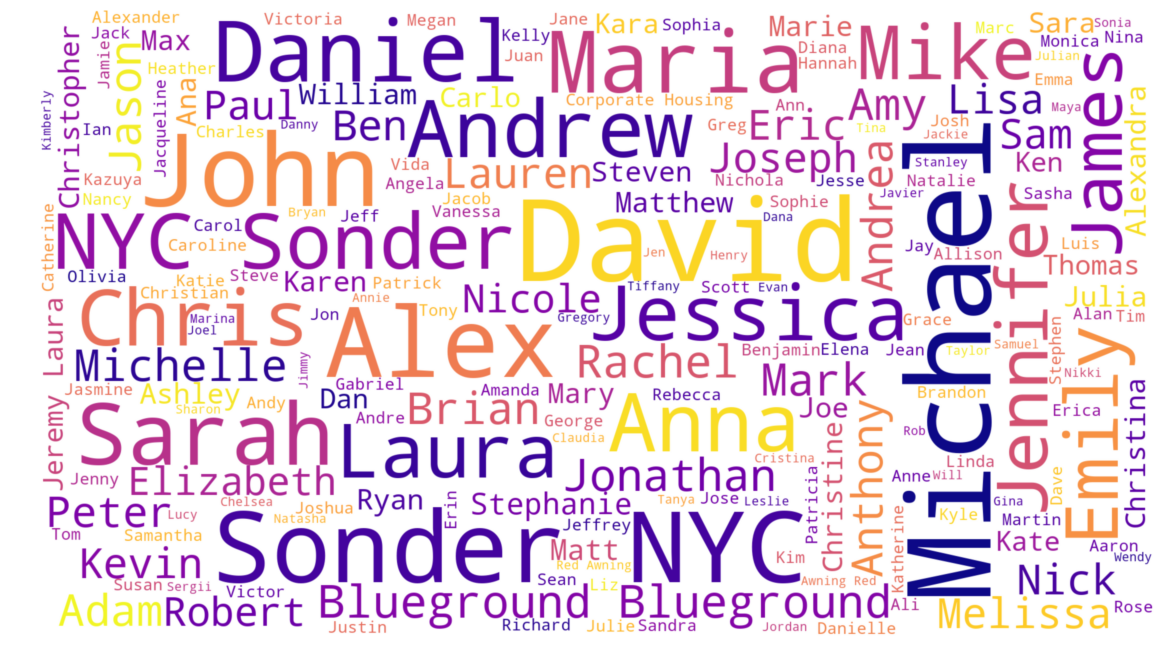

In [5]:
make_wordcloud(host_names)

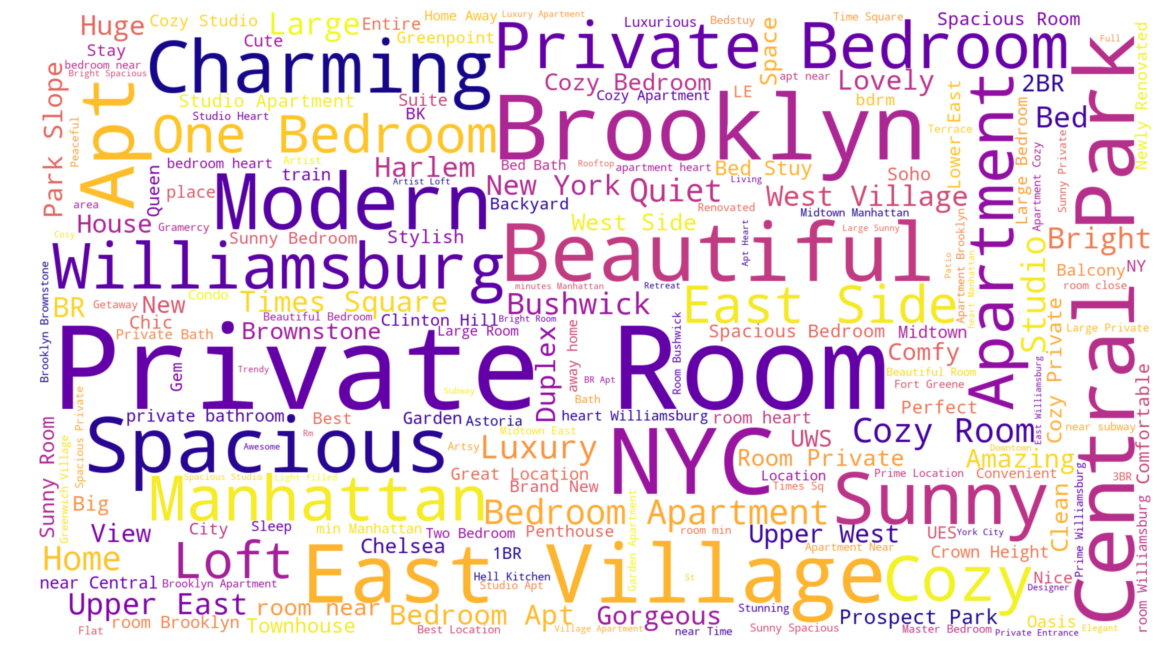

In [6]:
make_wordcloud(names)

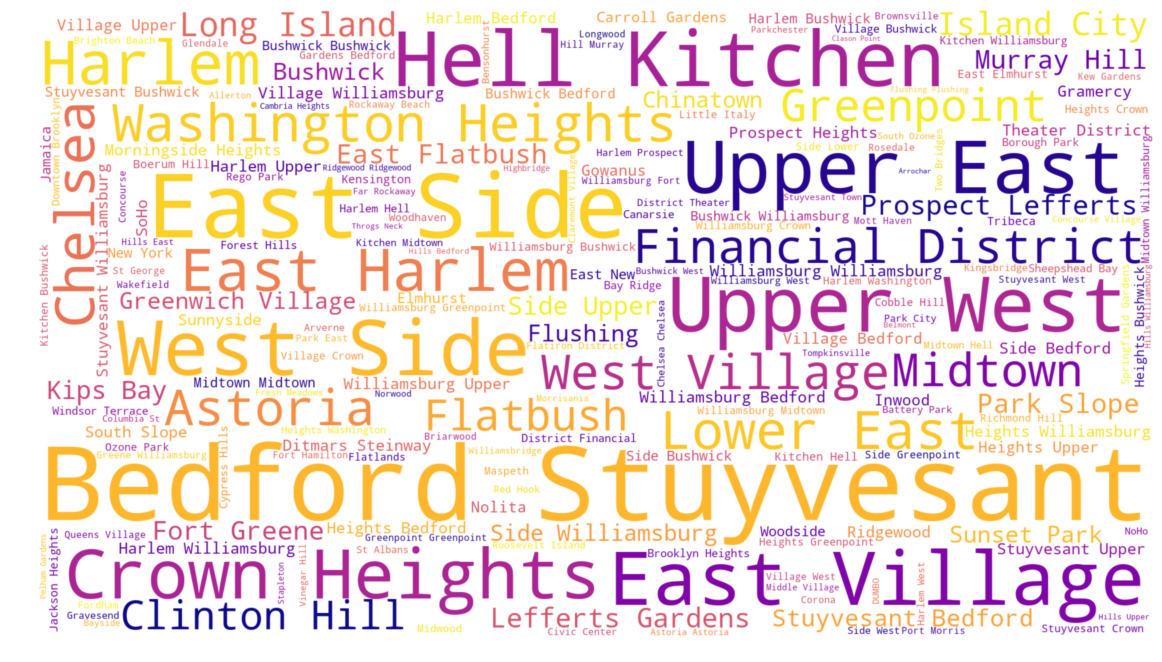

In [7]:
make_wordcloud(neighbourhood)

# Exploratory Analysis with Maps and graphs

In [8]:
crs = {'init':'epsg:4326'}
geometry = geopandas.points_from_xy(data.longitude, data.latitude)
geo_data = geopandas.GeoDataFrame(data,crs=crs,geometry=geometry)

In [9]:
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)

(-74.28337047811617, -73.67222994890714, 40.47514452612885, 40.93650364504154)

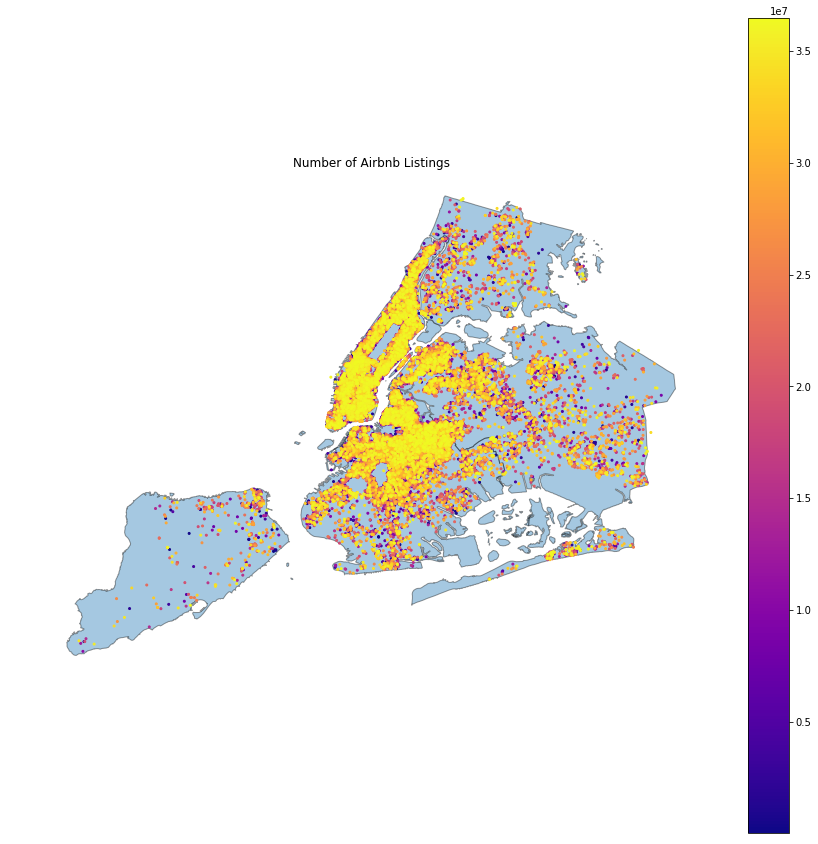

In [10]:
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='id',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Number of Airbnb Listings")
plt.axis('off')

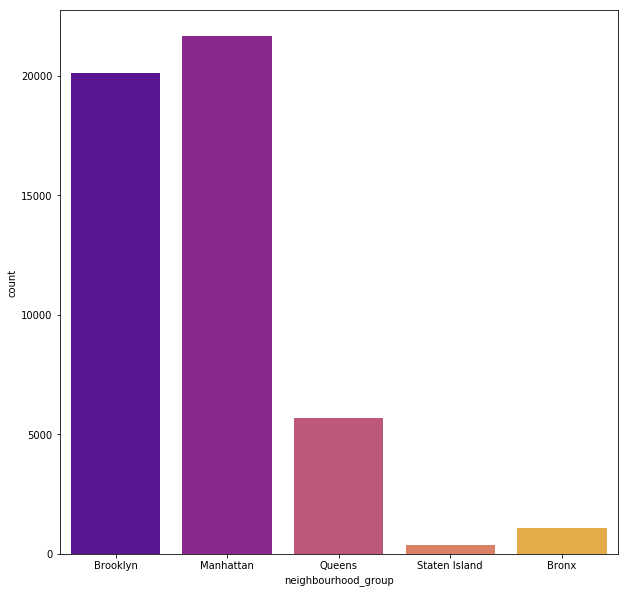

In [11]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data["neighbourhood_group"], palette="plasma" ) 

Manhattan have more listings than any other region.

(-74.28337047811617, -73.67222994890714, 40.47514452612885, 40.93650364504154)

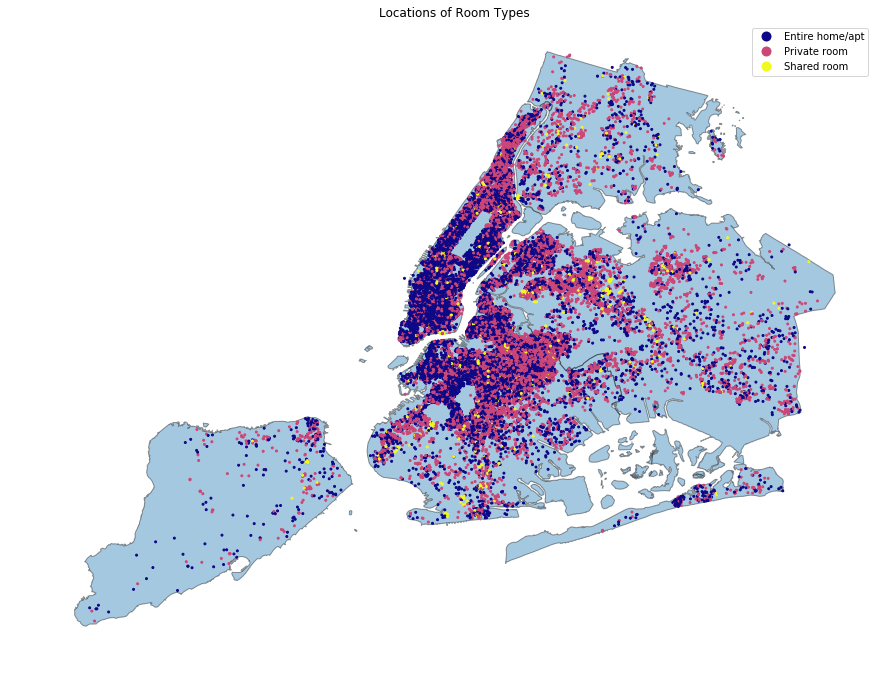

In [12]:
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='room_type',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Locations of Room Types")
plt.axis('off')

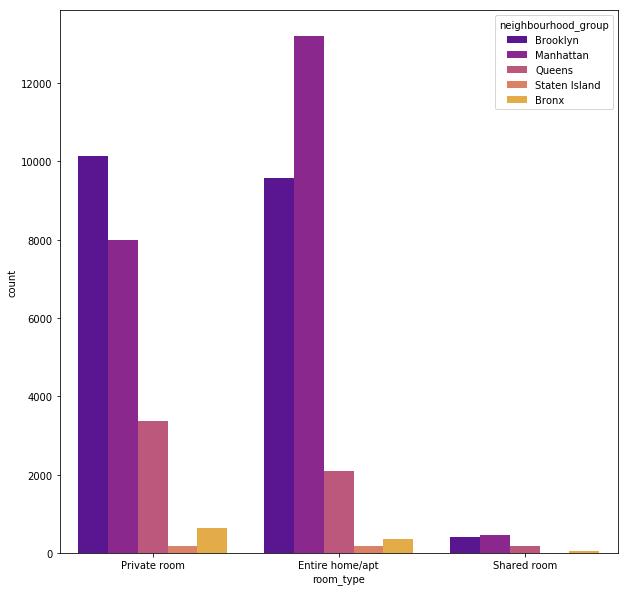

In [13]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data['room_type'],hue=data['neighbourhood_group'], palette='plasma')

We can see that the room type: Entire home/apt is predominant in most regions. 

(-74.28337047811617, -73.67222994890714, 40.47514452612885, 40.93650364504154)

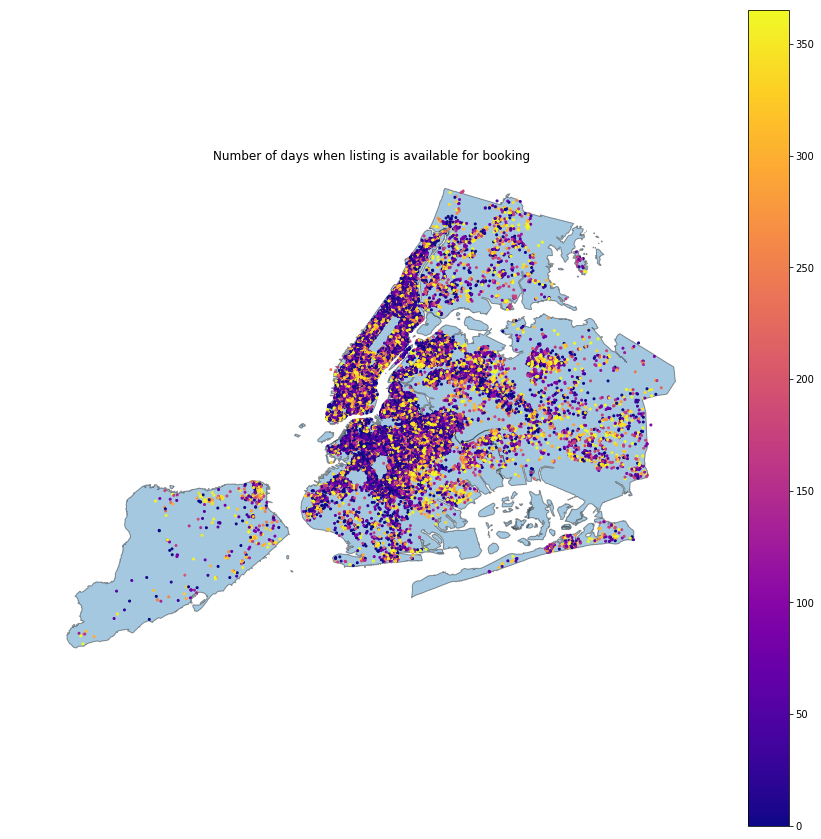

In [14]:
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='availability_365',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Number of days when listing is available for booking")
plt.axis('off')

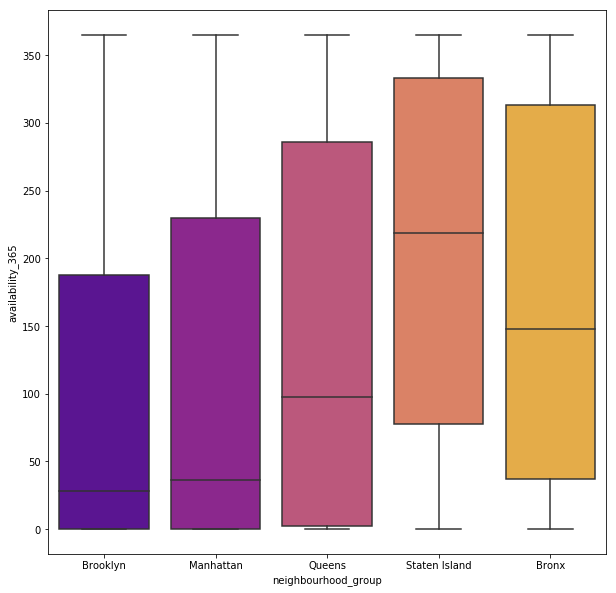

In [15]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='plasma')

In all regions we have a low availability for the listings.

# Analysing the price variable 


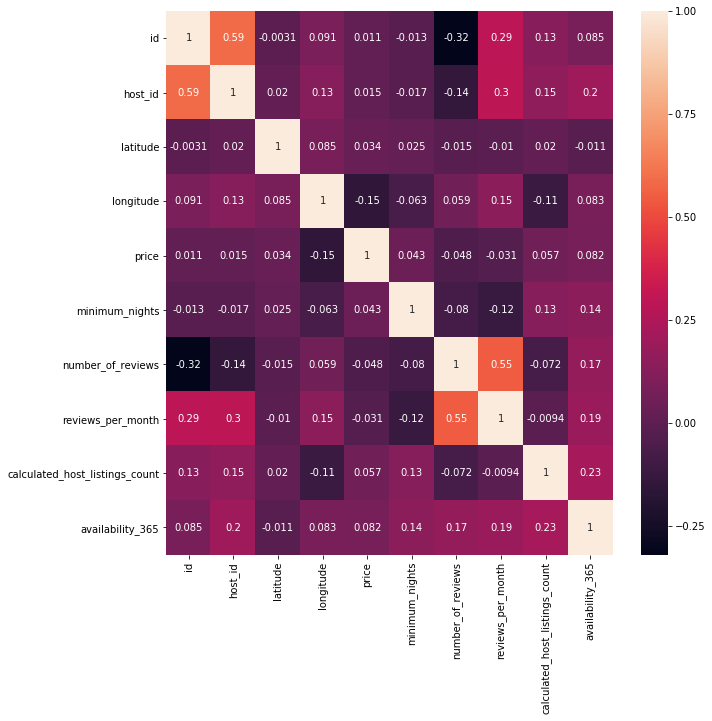

In [16]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(data.corr(),annot=True)

The variable price is very weak correlated with the other numerical variables.

In [17]:
data['price'].groupby(data["neighbourhood_group"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.50,106.71,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.38,186.87,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.88,291.38,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.52,167.10,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.81,277.62,13.0,50.0,75.0,110.0,5000.0


Manhattan is the most expensive region, with US$ 196.88 as a mean value.

Bronx is the less expensive region, with US$ 87.50 as a mean value.

In [18]:
data['price'].groupby(data["room_type"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.79,284.04,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.78,160.21,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.13,101.73,0.0,33.0,45.0,75.0,1800.0


Entire home/apt is the most expensive room type with US$ 211.79.

Shared Room is the less expansive room type with US$ 70.13.

# Predicting the price

In [19]:
df = data.copy()
df.drop(['id','host_id','name','host_name','last_review','geometry','neighbourhood'],axis=1,inplace=True)
df.dropna(inplace=True)
df_dummies = pd.get_dummies(df)

In [20]:
y = df_dummies['price']
df_dummies.drop(['price'],axis=1,inplace=True)
X = df_dummies

In [21]:
from sklearn import linear_model

reg = linear_model.LinearRegression().fit(X, y)
print("R²: {}".format(reg.score(X, y)))

R²: 0.1180600443831632


Well, as we can see a simple linear regression method cant predict the price

Maybe with Deep Learning we caan achieve better results.